<center><h1>Visualization</h1></center> 

In [3]:
import pandas
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [27]:
plt.style.use('bmh')

def compare(methods,plt_kind='bar',caption=''):
    
    merged_table=pd.DataFrame([])
    for method in methods:
        result_file=os.path.join(os.getcwd(),"Result",method,'result.csv')
        if os.path.exists(result_file):
            result_table=pd.read_csv(result_file,index_col=[-1,0],header=0).sort_index()
            result_table.columns = [each.strip()+'-'+method.split('-')[1] for each in list(result_table)]
            if merged_table.empty:
                merged_table=result_table
            else:
                merged_table=pd.merge(merged_table, result_table, how='outer',
                                      left_index=True,
                                      right_index=True)
    
    if not merged_table.empty:

        MAPs=merged_table[[each for each in list(merged_table) if "MAP" in each ]]
        MRRs=merged_table[[each for each in list(merged_table) if "MRR" in each ]]
        fig, (ax1,ax2) = plt.subplots(2,1)
        fig.subplots_adjust(hspace = 0.35)
        MAP_plot=MAPs.plot(kind=plt_kind,linestyle='-',figsize=(25,20),fontsize=15,
                                grid=True,style='.-',ax=ax1).set_ylabel("MAP (Mean Average Precision)", fontsize=18)
        ax1.set_xlabel("# of Source files, # of Bug Reports", fontsize=18)
        
        MRR_plot=MRRs.plot(kind=plt_kind,linestyle='-',figsize=(25,20),fontsize=15,
                                grid=True,style='.-',ax=ax2).set_ylabel("MRR (Mean Reciprocal Rank)", fontsize=18)

        ax2.set_xlabel("# of Source files, # of Bug Reports", fontsize=18)
        
        MAPs_differences=(MAPs.iloc[:,-2]/MAPs.iloc[:,-1])-1
        MRRs_differences=(MRRs.iloc[:,-2]/MRRs.iloc[:,-1])-1
        
        higher,lower,same=0,0,0
        higher_avg,lower_avg=0,0
        for i,each in enumerate([round(each*100,1) for each in list(MAPs_differences)]):
            if abs(each)>2:
                text=str(each)+'%'
                if each<0:
                    ax1.text(x=i,y=max(MAPs.iloc[i,-2],MAPs.iloc[i,-1])+0.02,s=' '+text,
                             bbox=dict(boxstyle='round,pad=0.1',facecolor='red', alpha=0.03*abs(each)),fontsize=13.5,rotation=90)
                    lower+=1
                    lower_avg+=each
                else:
                    ax1.text(x=i-0.3,y=max(MAPs.iloc[i,-2],MAPs.iloc[i,-1])+0.02,s=' '+text,
                             bbox=dict(boxstyle='round,pad=0.1',facecolor='green', alpha=0.03*abs(each)),fontsize=13.5,rotation=90)
                    higher+=1
                    higher_avg+=each
            else:
                same+=1
                

        ax1.text(51,0,
                s='Impr.: In {} projects ({}% chance), avg: {}%'.format(higher,int((higher/51)*100),round(higher_avg/higher),2),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='green', alpha=1),fontsize=14,rotation=90)
        ax1.text(52.25,0,
                s='Loss: In {} projects ({}% chance), avg: {}%'.format(lower,int((lower/51)*100),round(lower_avg/lower),2),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='red', alpha=1),fontsize=14,rotation=90)
        ax1.text(53.5,0,
                s="Wilcoxon P-Value: "+str(round(wilcoxon(MAPs.iloc[:,0].to_numpy(copy=True),MAPs.iloc[:,1].to_numpy(copy=True)).pvalue,10)),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='blue', alpha=1),fontsize=14,rotation=90)        
        ax1.set_ylim(0,1)
        
        
        higher_MRR,lower_MRR,same_MRR=0,0,0
        higher_avg_MRR,lower_avg_MRR=0,0
        for i,each in enumerate([round(each*100,1) for each in list(MRRs_differences)]):
            if abs(each)>2:
                text=str(each)+'%'
                if each<0:
                    lower_MRR+=1
                    lower_avg_MRR+=each
                    ax2.text(x=i,y=max(MRRs.iloc[i,-2],MRRs.iloc[i,-1])+0.02,s=' '+text,
                             bbox=dict(facecolor='red', boxstyle='round,pad=0.1',alpha=0.03*abs(each)),fontsize=13.5,rotation=90)
                else:
                    higher_MRR+=1
                    higher_avg_MRR+=each
                    ax2.text(x=i-0.3,y=max(MRRs.iloc[i,-2],MRRs.iloc[i,-1])+0.02,s=' '+text,
                             bbox=dict(facecolor='green', boxstyle='round,pad=0.1', alpha=0.03*abs(each)),fontsize=13.5,rotation=90)
            else:
                same_MRR+=1
        ax2.text(51,0,
                s='Impr.: In {} projects ({}% chance), avg: {}%'.format(higher_MRR,int((higher_MRR/51)*100),round(higher_avg_MRR/higher_MRR),2),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='green', alpha=1),fontsize=14,rotation=90)
        ax2.text(52.25,0,
                s='Loss: In {} projects ({}% chance), avg: {}%'.format(lower_MRR,int((lower_MRR/51)*100),round(lower_avg_MRR/lower_MRR),2),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='red', alpha=1),fontsize=14,rotation=90)        
        ax2.text(53.5,0,
                s="Wilcoxon P-Value: "+str(round(wilcoxon(MRRs.iloc[:,0].to_numpy(copy=True),MRRs.iloc[:,1].to_numpy(copy=True)).pvalue,10)),bbox=dict(boxstyle='round,pad=0.5',facecolor='none',edgecolor='blue', alpha=1),fontsize=14,rotation=90)              
        ax2.text(54,0,
                s=" ",bbox=dict(boxstyle='round,pad=0',facecolor='none',edgecolor='white', alpha=1),fontsize=1,rotation=90)              
        
        ax2.set_ylim(0,1)
        figure_filename=os.path.join(os.getcwd(),'Figs')
        if not os.path.exists(figure_filename):
            os.makedirs(figure_filename)

        MAPs.to_csv(os.path.join(figure_filename,'CSVs',caption+"_MAPs.csv"))
        MRRs.to_csv(os.path.join(figure_filename,'CSVs',caption+"_MRRs.csv"))
        fig.savefig(os.path.join(figure_filename,caption+".pdf"), bbox_inches='tight')

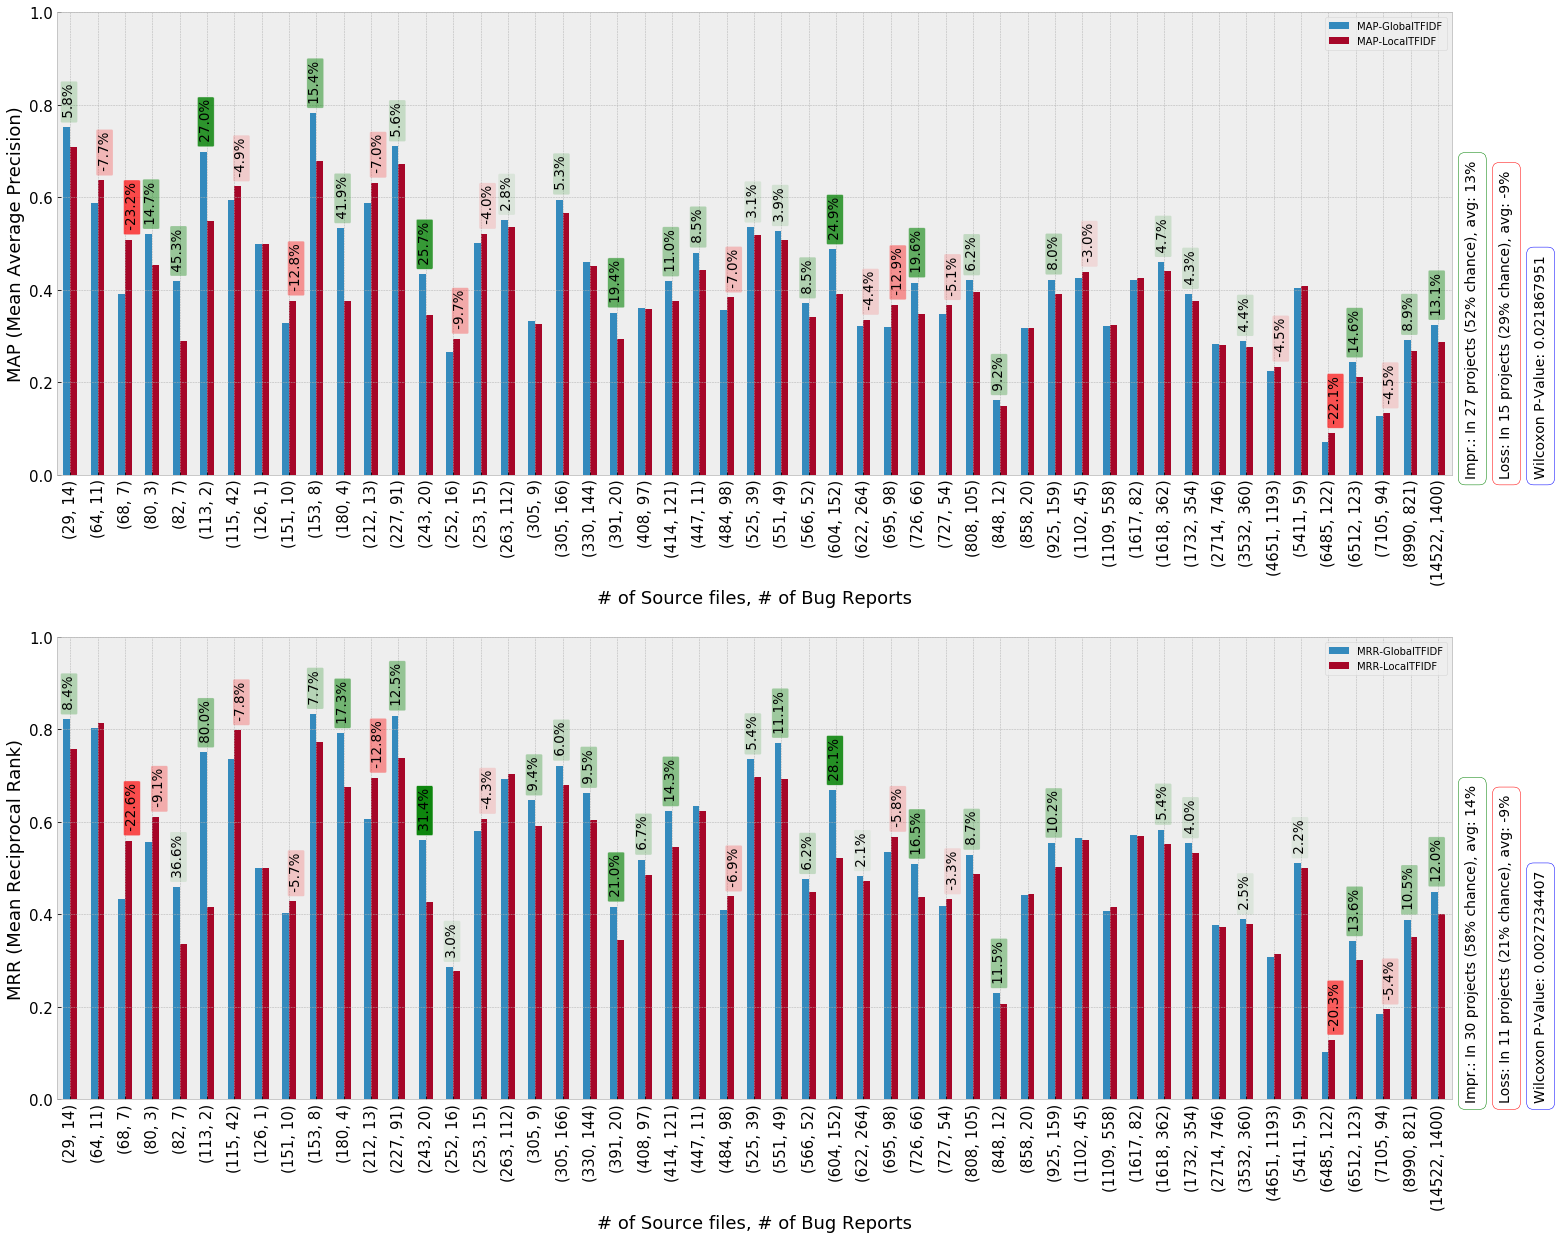

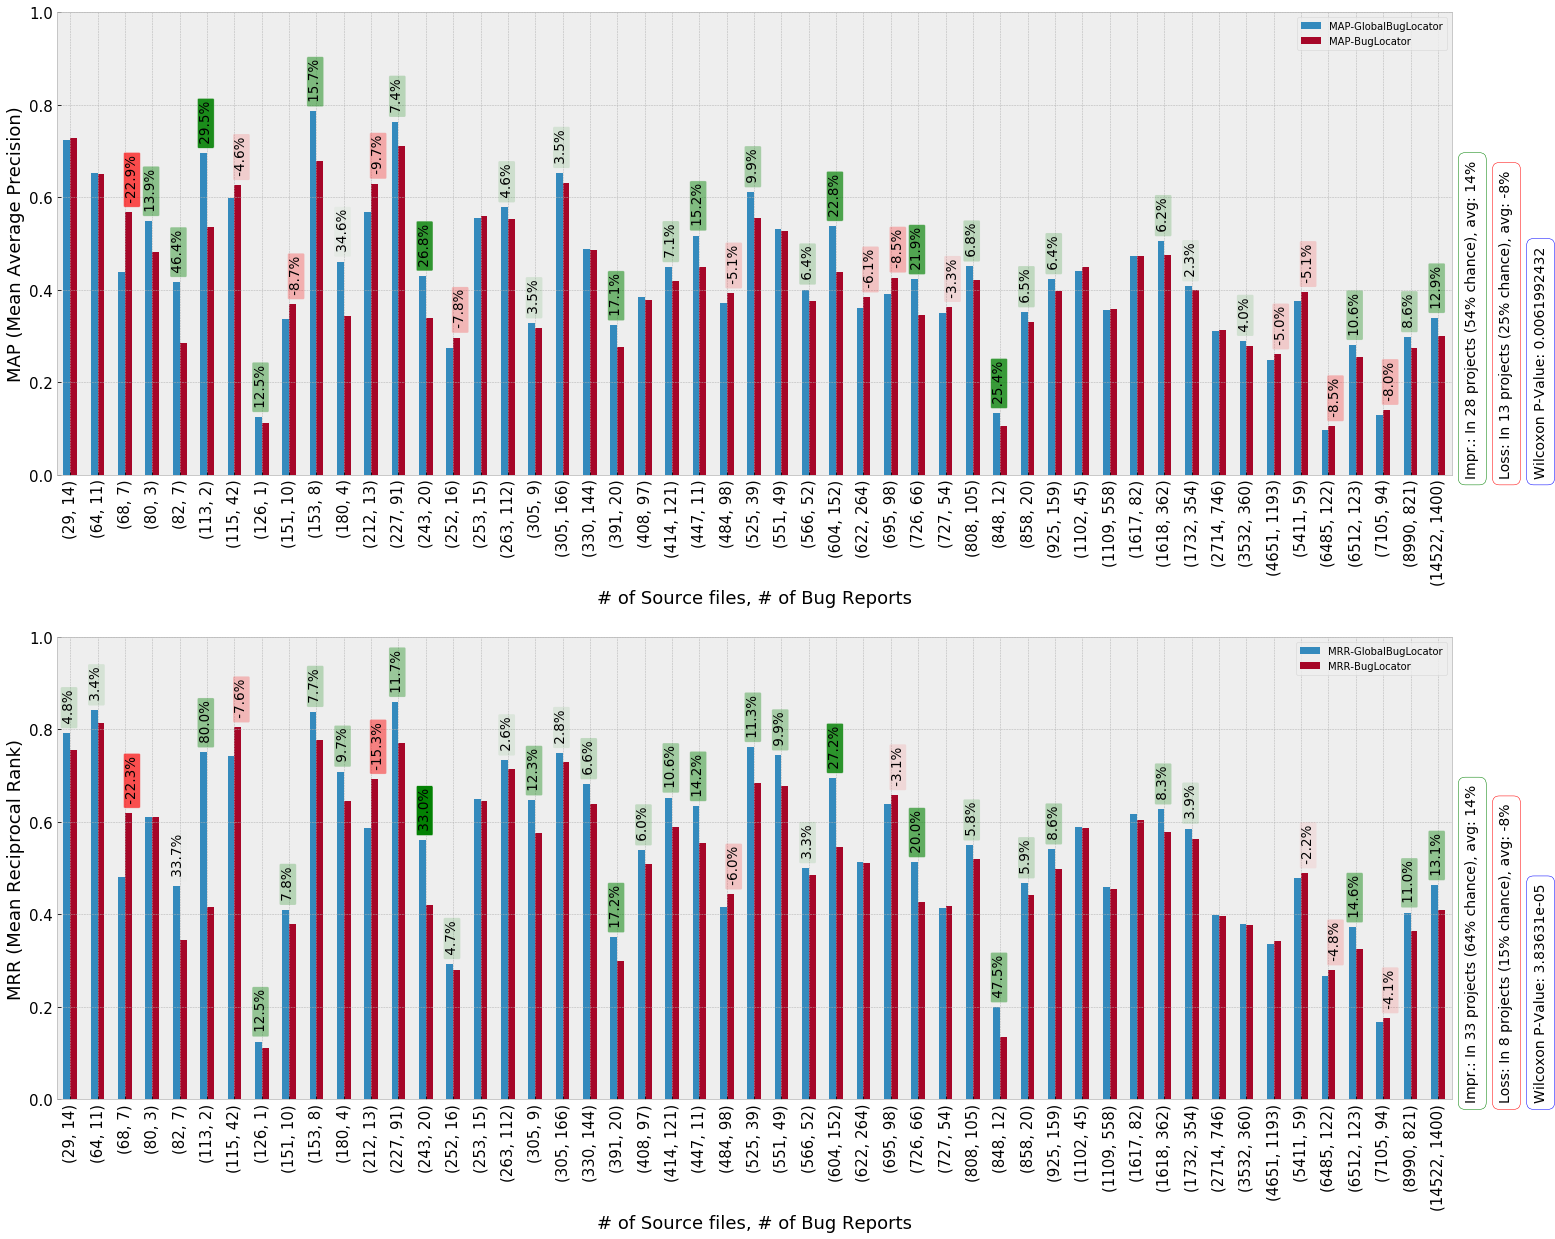

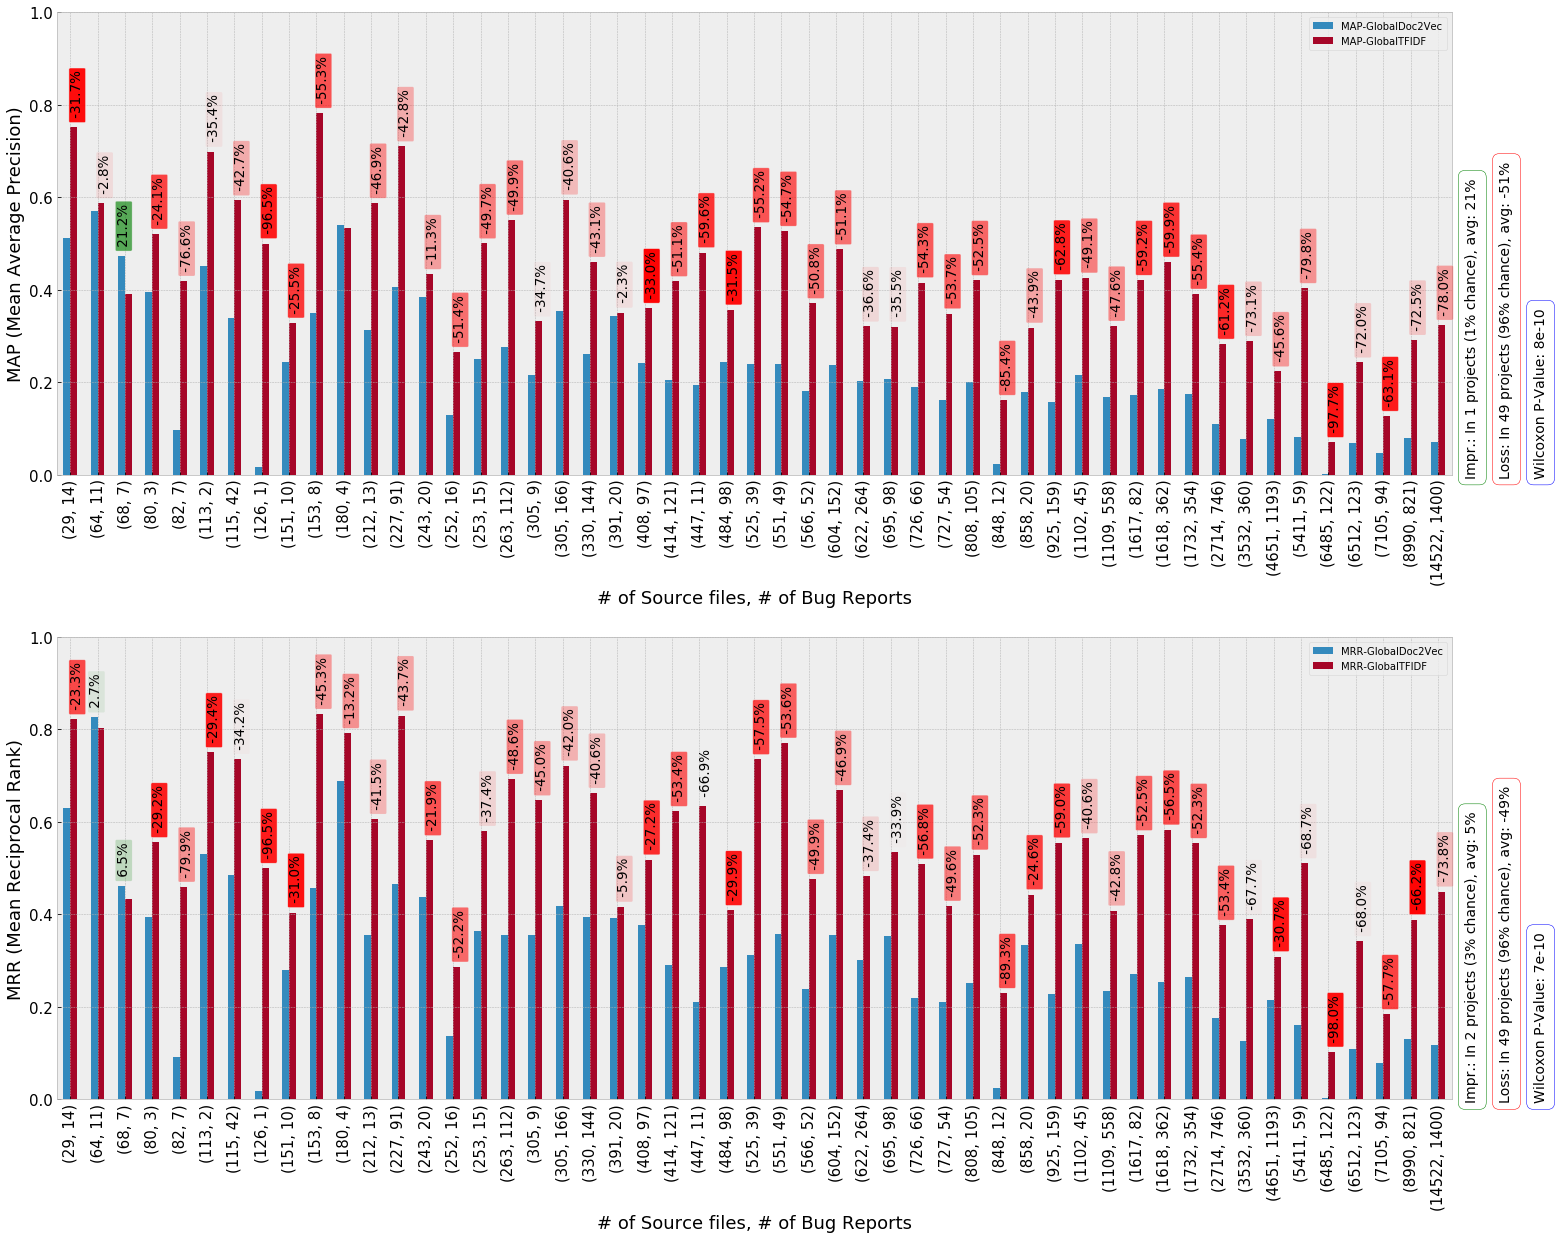

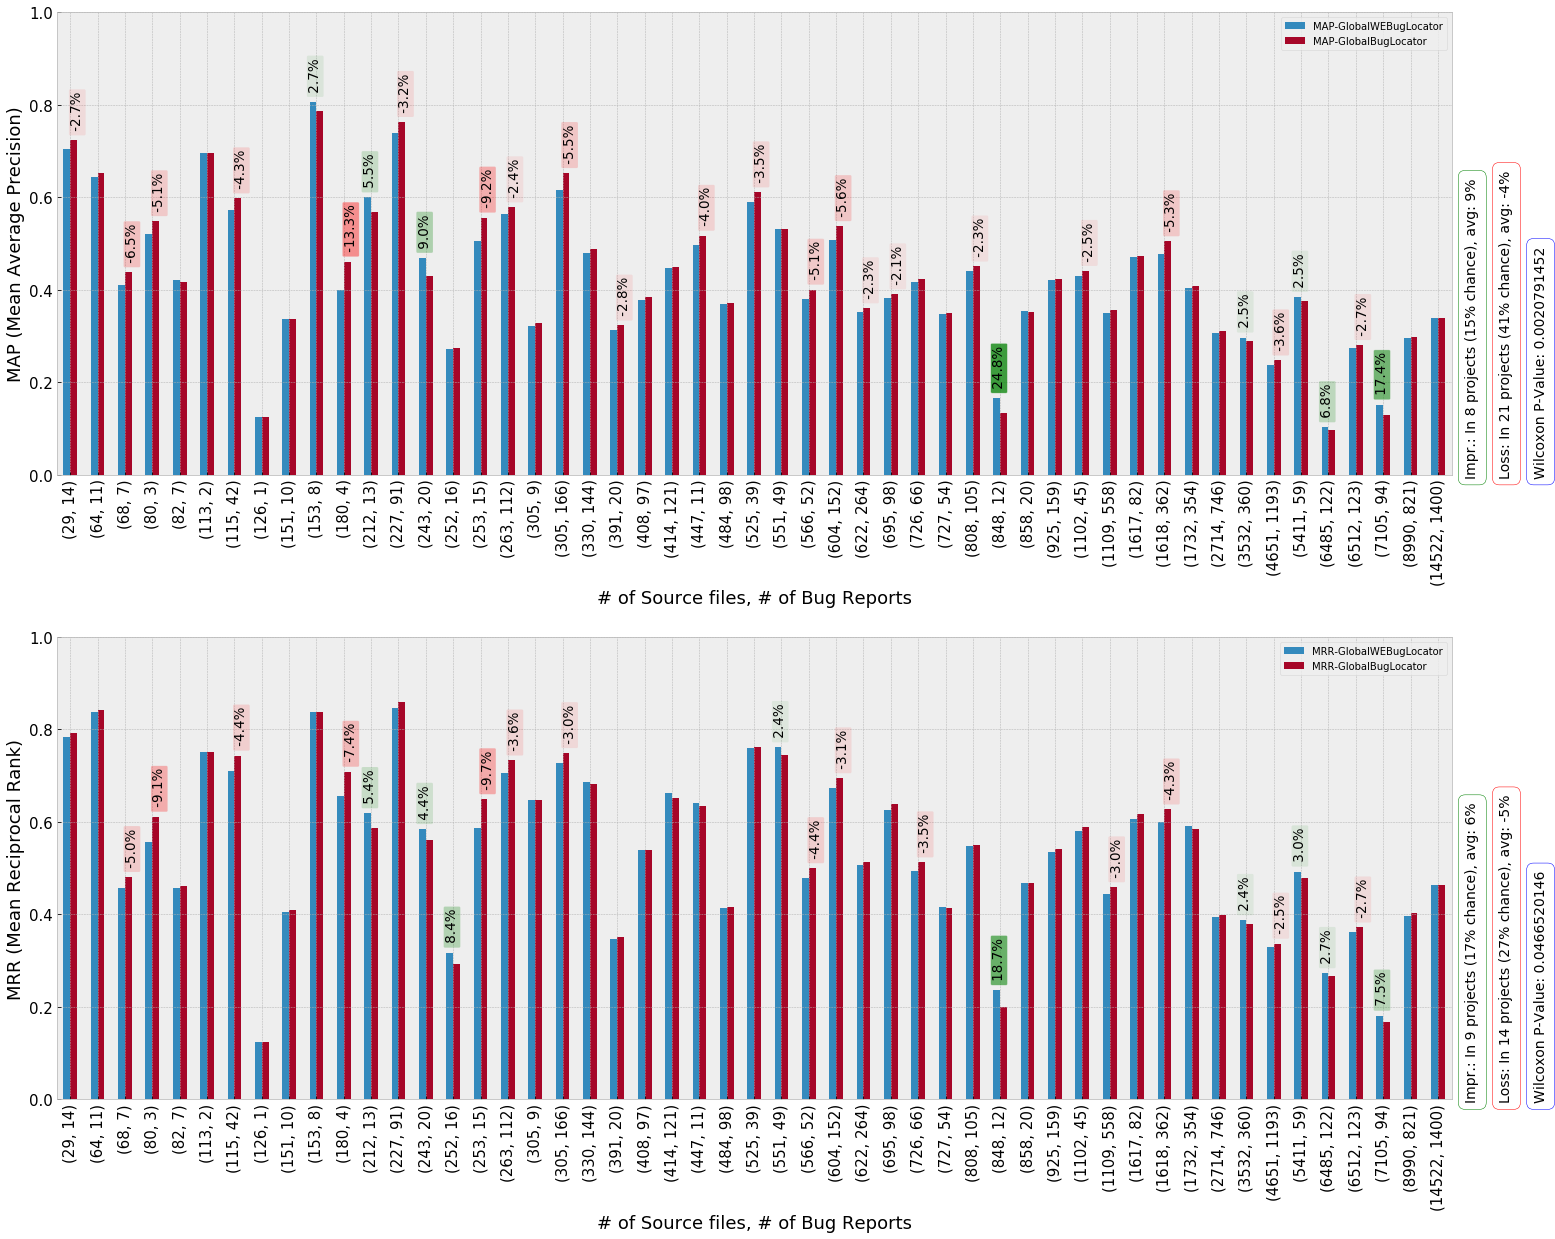

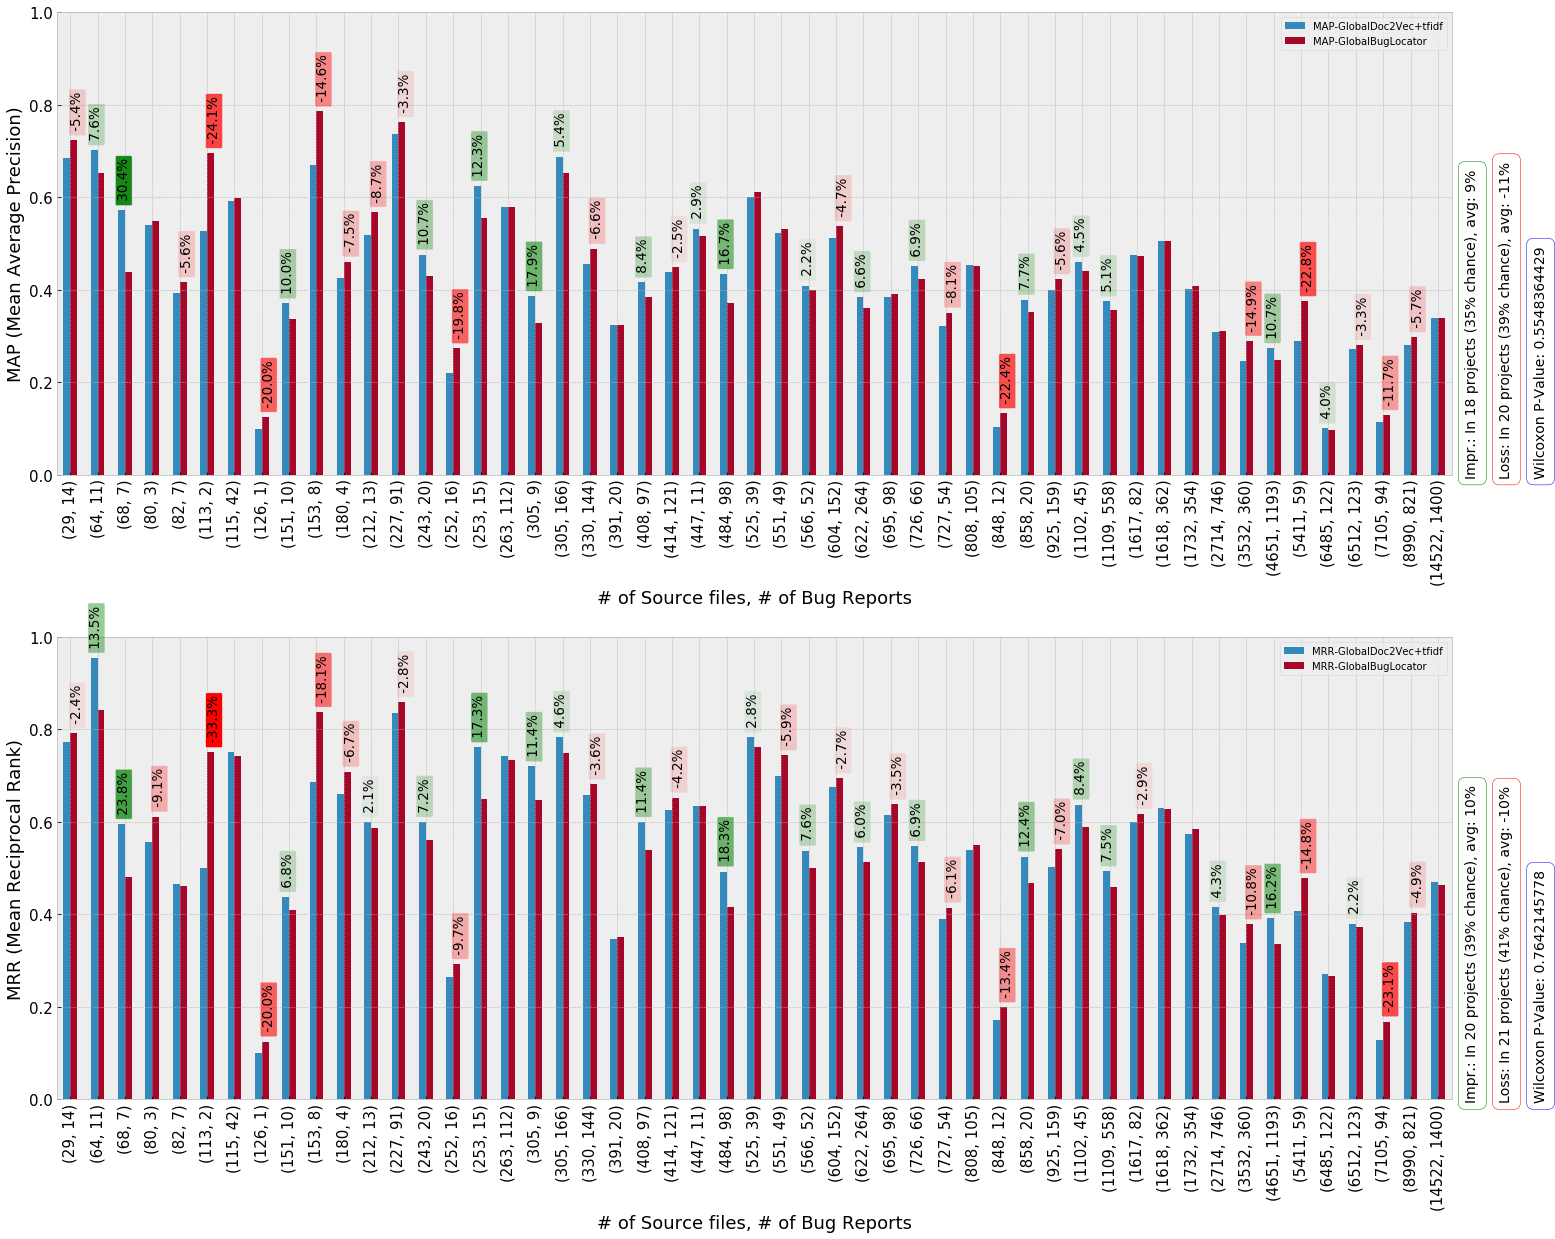

In [28]:

# RQ1-Results
compare(['4-GlobalTFIDF','5-LocalTFIDF'],plt_kind='bar',caption='RQ1-Results')

# RQ2-Results
compare(['7-GlobalBugLocator','6-BugLocator'],plt_kind='bar',caption='RQ2-Results')

# # RQ3-Results
compare(['1-GlobalDoc2Vec','4-GlobalTFIDF'],plt_kind='bar',caption='RQ3-Results')

# # RQ4-Results
compare(['8-GlobalWEBugLocator','7-GlobalBugLocator'],plt_kind='bar',caption='RQ4-Results')

# # RQ5-Results
compare(['3-GlobalDoc2Vec+tfidf','7-GlobalBugLocator'],plt_kind='bar',caption='RQ5-Results')


In [84]:
plt.style.use('bmh')

def BoxPlot(methods,caption=''):

    merged_table=pd.DataFrame([])
    for method in methods:
        result_file=os.path.join(os.getcwd(),"Result",method,'result.csv')
        if os.path.exists(result_file):
            result_table=pd.read_csv(result_file,index_col=[0,1],header=0).sort_index()
            result_table.columns = [each.strip()+'-'+method.split('-')[1] for each in list(result_table)]
            if merged_table.empty:
                merged_table=result_table
            else:
                merged_table=pd.merge(merged_table, result_table, how='outer',
                                      left_index=True,
                                      right_index=True)
    if not merged_table.empty:

        MAPs=merged_table[[each for each in list(merged_table) if "MAP" in each ]]
        MRRs=merged_table[[each for each in list(merged_table) if "MRR" in each ]]
        
        MRRs.columns=[each.split('MRR-')[1] for each in list(MRRs)]
        MAPs.columns=[each.split('MAP-')[1] for each in list(MAPs)]        
        
        fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
        fig.subplots_adjust(hspace = 0.35)
        MAP_plot=MAPs.boxplot(ax=ax1,vert=False).set_xlabel("MAP (Mean Average Precision)")

        MRR_plot=MRRs.boxplot(ax=ax2,vert=False).set_xlabel("MRR (Mean Reciprocal Rank)")

        
        for i,method in enumerate(methods):
            ax1.text(MAPs[method.split('-')[1]].median(),i+1-0.1,str(round(MAPs[method.split('-')[1]].median(),3)))
            ax1.text(MAPs[method.split('-')[1]].median()-0.03,i+1+0.3,'Mean: '+str(round(MAPs[method.split('-')[1]].mean(),3)),fontsize=10)
            ax2.text(MRRs[method.split('-')[1]].median(),i+1-0.1,str(round(MRRs[method.split('-')[1]].median(),3)))
            ax2.text(MRRs[method.split('-')[1]].median()-0.03,i+1+0.3,'Mean: '+str(round(MRRs[method.split('-')[1]].mean(),3)),fontsize=10)
            
        ax1.set_xlim(0,1)
        ax1.set_ylim(0,len(methods)+1)
        ax2.set_xlim(0,1)        
        ax2.set_ylim(0,len(methods)+1)
#         fig.suptitle( ' VS. '.join(methods), fontsize=12)
        figure_filename=os.path.join(os.getcwd(),'Figs')
        if not os.path.exists(figure_filename):
            os.makedirs(figure_filename)
        fig.savefig(os.path.join(figure_filename,caption+"_BoxPlots.pdf"), bbox_inches='tight')
        

In [ ]:

BoxPlot(['5-LocalTFIDF','4-Globaltfidf','6-bugLocator','7-GlobalBugLocator'],caption='Heuristic1')
BoxPlot(['7-GlobalBugLocator','1-GlobalDoc2Vec','8-GlobalWEBugLocator','3-GlobalDoc2Vec+tfidf'],caption='Heuristic2')


In [ ]:

plt.style.use('bmh')

def top_compare(methods,plt_kind='bar',caption=''):

    merged_table=pd.DataFrame([])
    for method in methods:
        tops_table=pd.DataFrame([])
        bugReports_path=os.path.join(os.getcwd(),'Result',method,"run",'BugReports')
        bugReportsfiles = [x for x in os.listdir(bugReports_path)]
        result={'project':[],"top_one_"+' '.join(method.split('-')[1:]):[],
                "top_five_"+' '.join(method.split('-')[1:]):[],
                "top_ten_"+' '.join(method.split('-')[1:]):[]}
        for BR_file in bugReportsfiles:
            top_one=0
            top_five=0
            top_ten=0
            total=0
            BR_table=pd.read_csv(os.path.join(bugReports_path,BR_file),index_col=[0],header=0)
            for i,topFound in BR_table.top_found.iteritems():
                if topFound==1:
                    top_one+=1
                if 0<topFound<=5:
                    top_five+=1  
                if 0<topFound<=10:
                    top_ten+=1
                if 0<topFound:
                    total+=1
            if total!=0:
                result['project'].append(BR_table.iloc[0].project)
                result["top_one_"+' '.join(method.split('-')[1:])].append(top_one/total)
                result["top_five_"+' '.join(method.split('-')[1:])].append(top_five/total)
                result["top_ten_"+' '.join(method.split('-')[1:])].append(top_ten/total)                
                
        if merged_table.empty:
            merged_table=pd.DataFrame(result).set_index('project')
        else:
            merged_table=pd.merge(merged_table, pd.DataFrame(result).set_index('project'), how='outer',
                                  left_index=True,
                                  right_index=True)        


    if not merged_table.empty:

        top_ones=merged_table[[each for each in list(merged_table) if "top_one" in each ]]
        top_fives=merged_table[[each for each in list(merged_table) if "top_five" in each ]]
        top_tens=merged_table[[each for each in list(merged_table) if "top_ten" in each ]]        


        fig, (ax1,ax2,ax3) = plt.subplots(3,1)
        fig.subplots_adjust(hspace = 0.20 if plt_kind=='box' else 0.6 )
        
        figSize=(5*len(methods),5**len(methods)) if plt_kind=='box' else (20,15)
        
        top_one_plot=top_ones.plot(kind=plt_kind,figsize=figSize,
                                grid=True,ax=ax1).set_ylabel("Top One")
        top_five_plot=top_fives.plot(kind=plt_kind,figsize=figSize,
                                grid=True,ax=ax2).set_ylabel("Top Five")
        top_ten_plot=top_tens.plot(kind=plt_kind,figsize=figSize,
                                grid=True,ax=ax3).set_ylabel("Top Ten")           

        ax1.set_xlabel("")
        ax2.set_xlabel("")
        ax3.set_xlabel("Projects")
        
        top_one_differences=(top_ones.iloc[:,-2]/top_ones.iloc[:,-1])-1
        top_five_differences=(top_fives.iloc[:,-2]/top_fives.iloc[:,-1])-1
        top_ten_differences=(top_tens.iloc[:,-2]/top_tens.iloc[:,-1])-1
        
        higher1,lower1,same1=0,0,0
        higher_avg1,lower_avg1=0,0
        for i,each in enumerate([round(each*100,1) for each in list(top_one_differences)]):
            if abs(each)>1:
                text=str(each)+'%'
                if each<0:
#                     ax1.text(x=i-0.5,y=max(top_ones.iloc[i,-2],top_ones.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='red', alpha=0.03*abs(each)))
                    lower1+=1
                    lower_avg1+=each
                else:
#                     ax1.text(x=i-0.5,y=max(top_ones.iloc[i,-2],top_ones.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='green', alpha=0.03*abs(each)))
                    higher1+=1
                    higher_avg1+=each
            else:
                same1+=1
                

        ax1.text(25,0.89,
                s='{} projects, avg: {}%'.format(higher1,round(higher_avg1/higher1),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='green', alpha=0.6))
        ax1.text(18,0.89,
                s='{} projects, avg: {}%'.format(lower1,round(lower_avg1/lower1),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='red', alpha=0.6))
        ax1.set_ylim(0,1)    
        
        
        higher2,lower2,same2=0,0,0
        higher_avg2,lower_avg2=0,0
        for i,each in enumerate([round(each*100,1) for each in list(top_five_differences)]):
            if abs(each)>1:
                text=str(each)+'%'
                if each<0:
#                     ax2.text(x=i-0.5,y=max(top_fives.iloc[i,-2],top_fives.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='red', alpha=0.03*abs(each)))
                    lower2+=1
                    lower_avg2+=each
                else:
#                     ax2.text(x=i-0.5,y=max(top_fives.iloc[i,-2],top_fives.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='green', alpha=0.03*abs(each)))
                    higher2+=1
                    higher_avg2+=each
            else:
                same2+=1
                

        ax2.text(25,1.1,
                s='{} projects, avg: {}%'.format(higher2,round(higher_avg2/higher2),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='green', alpha=0.6))
        ax2.text(18,1.1,
                s='{} projects, avg: {}%'.format(lower2,round(lower_avg2/lower2),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='red', alpha=0.6))
        ax2.set_ylim(0,1) 
        
        
        
        higher3,lower3,same3=0,0,0
        higher_avg3,lower_avg3=0,0
        
        for i,each in enumerate([round(each*100,1) for each in list(top_ten_differences)]):
            if abs(each)>1:
                text=str(each)+'%'
                if each<0:
#                     ax3.text(x=i-0.5,y=max(top_tens.iloc[i,-2],top_tens.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='red', alpha=0.03*abs(each)))
                    lower3+=1
                    lower_avg3+=each
                else:
#                     ax3.text(x=i-0.5,y=max(top_tens.iloc[i,-2],top_tens.iloc[i,-1])+0.01,s=text,
#                              bbox=dict(boxstyle='square,pad=0',facecolor='green', alpha=0.03*abs(each)))
                    higher3+=1
                    higher_avg3+=each
            else:
                same3+=1
                

        ax3.text(25,1.1,
                s='{} projects, avg: {}%'.format(higher3,round(higher_avg3/higher3),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='green', alpha=0.6))
        ax3.text(18,1.1,
                s='{} projects, avg: {}%'.format(lower3,round(lower_avg3/lower3),2),bbox=dict(boxstyle='round,pad=1',facecolor='none',edgecolor='red', alpha=0.6))
        ax3.set_ylim(0,1) 
        
        figure_filename=os.path.join(os.getcwd(),'Figs')
        if not os.path.exists(figure_filename):
            os.makedirs(figure_filename)
        fig.savefig(os.path.join(figure_filename,caption+'_'+plt_kind+".pdf"), bbox_inches='tight')






In [ ]:
# top_compare(['6-bugLocator','7-GlobalBugLocator'],plt_kind='bar',caption='RQ2_tops')

# top_compare(['8-GlobalWEBugLocator','7-GlobalBugLocator'],plt_kind='bar',caption='RQ4_tops')

top_compare(['3-GlobalDoc2Vec+tfidf','7-GlobalBugLocator'],plt_kind='bar',caption='RQ5_tops')

## Finding Examples

**** project:  DATAJPA
***Bug Description: DATAJPA-173 introduced a CrudMethodMetadata abstraction used in SimpleJpaRepository. As it&amp;apos;s an optional dependency (configured through a setter) we do guard access to it with null checks.


*** Fixes: simplejparepository


*** ID:  517


***WE Indirect ranking:  [('userrepositorytests', 1.0), ('queryutils', 1.0), ('eclipselinknamespaceuserrepositorytests', 1.0), ('jpametamodelentityinformation', 0.950413), ('jparepositorytests', 0.950413), ('jpametamodelentityinformationintegrationtests', 0.950413), ('samplewithidclasspk', 0.950413), ('samplewithidclass', 0.950413), ('eclipselinkjpametamodelentityinformationintegrationtests', 0.950413), ('jpametamodelentityinformationunittests', 0.950413)]

 ---------------------------------------------------------------------------------------------------- 



***TFIDF the most similar BR ID-> 363


***TFIDF the most similar BR -> SimpleJpaRepository.delete(ID id) calls exists() to detect whether an

/Users/nimayeganeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:87: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/nimayeganeh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:90: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


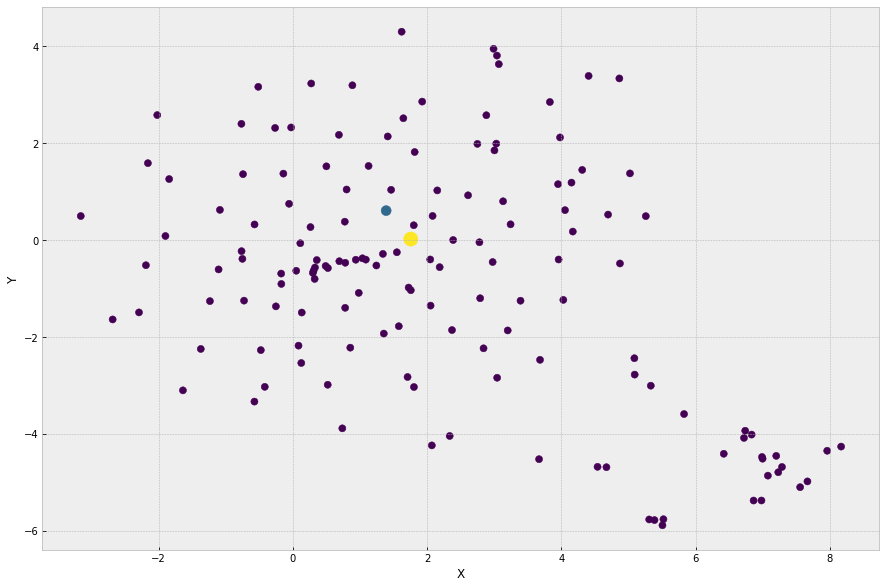

In [81]:
import operator
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
import pandas as pd
from sklearn.manifold import TSNE


def find_example(method_one,method_two):

    bugReports_path_one=os.path.join(os.getcwd(),'Result',method_one,"run1",'BugReports')
    bugReports_path_two=os.path.join(os.getcwd(),'Result',method_two,"run1",'BugReports')
    bugReportsfiles = [x for x in os.listdir(bugReports_path_one)]
    counter=0
    for BR_file in bugReportsfiles:
        BR_table_one=pd.read_csv(os.path.join(bugReports_path_one,BR_file),index_col=[0],header=0)
        BR_table_two=pd.read_csv(os.path.join(bugReports_path_two,BR_file),index_col=[0],header=0)
        
        for i,(ID,bugreport) in enumerate(BR_table_one.iterrows()):
            if BR_table_two.iloc[i].top_found==1:

                TF_one=int(BR_table_one.iloc[i].top_found)
                TF_two=int(BR_table_two.iloc[i].top_found)
                if TF_one>4:
#                     if counter<1:
#                         counter+=1
#                         continue
                    print("**** project: ",BR_table_one.iloc[0].project)
                    buggyFile=BR_table_two.iloc[i].total_score.split('{\'')[1].split('\'')[0]
                    Description=BR_table_one.iloc[i].description
                    fixes=BR_table_one.iloc[i].fix

                    WEIndirect=BR_table_one.iloc[i].Indirect_scores
                    TFIDFindirect=BR_table_two.iloc[i].Indirect_scores
                    
                    BR_WEIndirect=BR_table_one.iloc[i].BR_scores
                    BR_TFIDFindirect=BR_table_two.iloc[i].BR_scores
                    
                    BR_WE_indirect={each.split(':')[0].replace('{','').replace('\'','').strip():float(each.split(':')[1][:-1].strip()) for each in BR_WEIndirect.split(',')}
                    sorted_BR_WE_indirec = sorted(BR_WE_indirect.items(), key=operator.itemgetter(1),reverse=True)
                    
                    BR_TFIDF_indirect={each.split(':')[0].replace('{','').replace('\'','').strip():float(each.split(':')[1][:-1].strip()) for each in BR_TFIDFindirect.split(',')}
                    sorted_BR_TFIDF_indirec = sorted(BR_TFIDF_indirect.items(), key=operator.itemgetter(1),reverse=True)
                    
                    print("***Bug Description: "+Description)
                    print("\n\n*** Fixes: "+buggyFile)
                    print("\n\n*** ID: ",ID)
                    
                    
                    allBRDoe2vec= BR_table_one.doc2vec_vector
                    listAllBRDoe2vec= np.array([np.array([float(number.replace('[','').replace(']','').strip()) for number in each.split() 
                                       if number.replace('[','').replace(']','').strip()!='']) 
                                      for each in allBRDoe2vec])

                    tsne = TSNE(n_components=2, random_state=2)
                    tsne_obj= tsne.fit_transform(listAllBRDoe2vec)
                    tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'marker':50})

   
                    WE_indirect={each.split(':')[0].replace('{','').replace('\'','').strip():float(each.split(':')[1][:-1].strip()) for each in WEIndirect.split(',')}
                    sorted_WE_indirec = sorted(WE_indirect.items(), key=operator.itemgetter(1),reverse=True)
                    
                    TFIDF_indirect={each.split(':')[0].replace('{','').replace('\'','').strip():float(each.split(':')[1][:-1].strip()) for each in TFIDFindirect.split(',')}
                    sorted_TFIDF_indirec = sorted(TFIDF_indirect.items(), key=operator.itemgetter(1),reverse=True)
                    
                    print("\n\n***WE Indirect ranking: ",sorted_WE_indirec[:10])

                    print('\n',"-"*100,'\n')
                    ActualMostSimilar=sorted_BR_TFIDF_indirec[1][0]
                    ActualMostSimilarIndex=BR_table_two.index.get_loc(BR_table_two.loc[int(ActualMostSimilar)].name)
                    print("\n\n***TFIDF the most similar BR ID->",ActualMostSimilar)                 
                    print("\n\n***TFIDF the most similar BR ->",BR_table_two.loc[int(sorted_BR_TFIDF_indirec[1][0])].description)                 
                    print("\n\n***TFIDF the most similar BR fixes ->",BR_table_two.loc[int(sorted_BR_TFIDF_indirec[1][0])].fix)                    
                    print("\n\n***TFIDF Indirect ranking: ",sorted_TFIDF_indirec[:10])
                    
                    print('\n',"-"*100,'\n')
                    print("\n\n***WE the most similar BR ->",BR_table_one.loc[int(sorted_BR_WE_indirec[1][0])].description)
                    print("\n\n***WE the most similar BR fixes->",BR_table_one.loc[int(sorted_BR_WE_indirec[1][0])].fix)
                    print("\n\n***WE the most similar BRs ->",sorted_BR_WE_indirec[:15])   

                    print('\n',"-"*100,'\n')
                    print("\n\nTop_Found_GlobalWEBugLocator: ",TF_one)
                    print("Top_Found_GlobalBugLocator: ",TF_two)                        

                    tsne_df.set_value(i, 'marker', 200)
                    for j,(idx,br) in enumerate(BR_table_one.iterrows()):
                        if idx==int(ActualMostSimilar):
                            tsne_df.set_value(j, 'marker', 100)
                            print(">>>>>>",j)
                            
                    ax=tsne_df.plot(kind='scatter',x='X',y='Y',s=tsne_df.marker,c=tsne_df.marker,figsize=(15,10),colormap='viridis',colorbar=False)
                    ax.get_figure().savefig(os.path.join("x.pdf"), bbox_inches='tight')

                    return (Description,buggyFile)
        
result=find_example('8-GlobalWEBugLocator','7-GlobalBugLocator')
